In [ ]:
from collections import defaultdict
from benchmark_utils import *

In [ ]:
n = 100
m = 100
density = 0.1  # Probability of observing each entry

# seed
seed = int(time.time())

# Generate synthetic problem
X_true, X_obs, mask, u_true, v_true = generate_synthetic_problem(m, n, density,
                                                                 seed - 1)  # seed-1 to avoid overlap with the gaussian initialization seed as they'd be the same otherwise

In [ ]:
# Baseline using Truncated SVD with imputed values
print("\n=== Truncated SVD ===")
observed_error_svd, full_error_svd, time_svd = baseline_svd_numpy(X_true, X_obs, mask)
print(f"SVD: Observed Error={observed_error_svd:.6f}, Full Error={full_error_svd:.6f}, Time={time_svd:.4f}s")

In [ ]:
# Benchmark the different initialization strategies
print("=== Gaussian Initialization ===")
u0_g, v0_g = initialize_uv(X_obs, mask, strategy='gaussian', seed=seed)
# Benchmark the different solvers
gauss = compare_solvers(X_obs, X_true, u0_g.copy(), v0_g.copy(), mask, plot=True, gd_params=[9e-3, 7.94e-01],
                        max_it=5000, patience=3)

In [ ]:
print("\n=== SVD Initialization ===")
u0_s, v0_s = initialize_uv(X_obs, mask, strategy='svd', seed=seed)
svd = compare_solvers(X_obs, X_true, u0_s.copy(), v0_s.copy(), mask, lambda_als=[1e-8, 1e-10], gd_params=[1e-02, 1e-08],
                      plot=True, max_it=5000, patience=3)

In [ ]:
print("\n=== SVD + Noise Initialization ===")
u0_sn, v0_sn = initialize_uv(X_obs, mask, strategy='svd', epsilon=0.1, seed=seed)
svd_n = compare_solvers(X_obs, X_true, u0_sn.copy(), v0_sn.copy(), mask, lambda_als=[3e-8, 1e-10],
                        gd_params=[1.78e-02, 1e-8], plot=True, max_it=5000, patience=3)

In [ ]:
print("\n=== Mean Initialization ===")
u0_m, v0_m = initialize_uv(X_obs, mask, strategy='mean', seed=seed)
mean = compare_solvers(X_obs, X_true, u0_m.copy(), v0_m.copy(), mask, lambda_als=[1e-0, 5.80e-03],
                       gd_params=[1.78e-05, 5.62e-05], plot=True, max_it=5000, patience=3)

In [ ]:
# compare the results of the different initializations and solvers in a table

# Create a DataFrame to store the results
results_ALS = pd.DataFrame({
    'Method': ['Gaussian', 'SVD', 'SVD + Noise', 'Mean'],
    'Observed Error': [
        gauss['ALS']['observed_error'],
        svd['ALS']['observed_error'],
        svd_n['ALS']['observed_error'],
        mean['ALS']['observed_error']
    ],
    'Full Error': [
        gauss['ALS']['full_error'],
        svd['ALS']['full_error'],
        svd_n['ALS']['full_error'],
        mean['ALS']['full_error']
    ],
    'Time': [
        gauss['ALS']['time'],
        svd['ALS']['time'],
        svd_n['ALS']['time'],
        mean['ALS']['time']
    ]
})
# Convert the DataFrame to a string table
table_str = tabulate(results_ALS, headers='keys', tablefmt='pretty', showindex=False)
# Print the table
print("=== Alternating Optimization (ALS) ===")
print(table_str)

results_NormALS = pd.DataFrame({
    'Method': ['Gaussian', 'SVD', 'SVD + Noise', 'Mean'],
    'Observed Error': [
        gauss['NormALS']['observed_error'],
        svd['NormALS']['observed_error'],
        svd_n['NormALS']['observed_error'],
        mean['NormALS']['observed_error']
    ],
    'Full Error': [
        gauss['NormALS']['full_error'],
        svd['NormALS']['full_error'],
        svd_n['NormALS']['full_error'],
        mean['NormALS']['full_error']
    ],
    'Time': [
        gauss['NormALS']['time'],
        svd['NormALS']['time'],
        svd_n['NormALS']['time'],
        mean['NormALS']['time']
    ]
})

# Convert the DataFrame to a string table
table_str = tabulate(results_NormALS, headers='keys', tablefmt='pretty', showindex=False)
# Print the table
print("=== Alternating Optimization with Normalization (NormALS) ===")
print(table_str)

results_gd = pd.DataFrame({
    'Method': ['Gaussian', 'SVD', 'SVD + Noise', 'Mean'],
    'Observed Error': [
        gauss['GD']['observed_error'],
        svd['GD']['observed_error'],
        svd_n['GD']['observed_error'],
        mean['GD']['observed_error']
    ],
    'Full Error': [
        gauss['GD']['full_error'],
        svd['GD']['full_error'],
        svd_n['GD']['full_error'],
        mean['GD']['full_error']
    ],
    'Time': [
        gauss['GD']['time'],
        svd['GD']['time'],
        svd_n['GD']['time'],
        mean['GD']['time']
    ]
})
# Convert the DataFrame to a string table
table_str = tabulate(results_gd, headers='keys', tablefmt='pretty', showindex=False)
# Print the table
print("=== Gradient Descent (GD) ===")
print(table_str)


# Benchmarking over 50 seeds

In [ ]:
init_settings = {
    'gaussian': {
        'lambda_als': [0.403, 1.5e-2],
        'gd_params': [9e-3, 7.94e-01]
    },
    'svd': {
        'lambda_als': [1e-8, 1e-10],
        'gd_params': [1.78e-02, 1e-08]
    },
    'svd+noise': {
        'lambda_als': [3e-8, 1e-10],
        'gd_params': [1e-02, 1e-8]
    },
    'mean': {
        'lambda_als': [1e-0, 5.80e-03],
        'gd_params': [1.78e-05, 5.62e-05]
    }
}

## Baseline using Truncated SVD

In [ ]:
# baseline using Truncated SVD with imputed values over 20 seeds
svd_observed_errors = []
svd_full_errors = []
for seed in range(50):
    X_true, X_obs, mask, u_true, v_true = generate_synthetic_problem(m, n, density,
                                                                     seed)
    observed_error_svd, full_error_svd, time_svd = baseline_svd(X_true, X_obs, mask)
    svd_observed_errors.append(observed_error_svd)
    svd_full_errors.append(full_error_svd)

# Convert the results to a DataFrame for better visualization
svd_results = pd.DataFrame({
    'Observed Error': svd_observed_errors,
    'Full Error': svd_full_errors,
})
print("=== Truncated SVD Results (mean over 20 seeds) ===")
print(tabulate(svd_results.mean().reset_index(), headers=['Metric', 'Value'], tablefmt='pretty', showindex=False))


# Benchmarking over 50 seeds at 0.1 density

In [ ]:
# Structure: method -> solver -> list of errors
accum_results = defaultdict(lambda: defaultdict(list))

for seed in range(50):
    seed_results = run_benchmark_for_seed(seed + 1, density=0.1, m=m, n=n, init_settings=init_settings)
    for method, solvers in seed_results.items():
        for solver, vals in solvers.items():
            accum_results[method][f'{solver}_obs'].append(vals['observed_error'])
            accum_results[method][f'{solver}_full'].append(vals['full_error'])
            accum_results[method][f'{solver}_time'].append(vals['time'])
            accum_results[method][f'{solver}_iterations'].append(vals['iterations'])

# === PRINT TABLES ===
for solver in ['ALS', 'NormALS', 'GD', 'Baseline SVD']:
    print(f"=== {solver} ===")
    df = summarize_solver_results(solver, accum_results)
    print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))
    print()

## Benchmarking over 50 seeds at different densities

In [ ]:
# Densities and categories
densities = [0.1, 0.2, 0.3, 0.4, 0.5]
solvers = ['ALS', 'NormALS', 'GD', 'Baseline SVD']  # Baseline SVD is included for completeness
methods = ['Gaussian', 'Svd', 'Mean']
metrics = {
    'Observed Error': 'obs',
    'Full Error': 'full',
    'Time': 'time',
    'Iterations': 'iterations',
}
# Defines distinct markers for plotting
method_markers = {
    'Gaussian': 'o',
    'Svd': 's',
    'Mean': 'D',
    'noise': '^',
}

In [ ]:
accum_results = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

for density in densities:
    print(f"Running benchmark for density={density}")
    for seed in range(50):
        seed_results = run_benchmark_for_seed(seed + 1, density=density, m=m, n=n, init_settings=init_settings)

        for method, solvers in seed_results.items():
            for solver, vals in solvers.items():
                accum_results[density][method][f'{solver}_obs'].append(vals['observed_error'])
                accum_results[density][method][f'{solver}_full'].append(vals['full_error'])
                accum_results[density][method][f'{solver}_time'].append(vals['time'])
                accum_results[density][method][f'{solver}_iterations'].append(vals['iterations'])

    # === PRINT TABLES ===
    for solver in ['ALS', 'NormALS', 'GD', 'Baseline SVD']:
        print(f"=== {solver} ===")
        df = summarize_solver_results(solver, accum_results[density])
        print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))
        print()

In [ ]:
# Loop over metrics and generate plots
for metric_name, suffix in metrics.items():
    # Collect metric values: key = "Solver + Method"
    metric_data = defaultdict(list)

    for density in densities:
        for solver in solvers:
            if solver == 'Baseline SVD':
                # Special case for Baseline SVD
                key = f"{solver}"
                try:
                    value = np.mean(accum_results[density][solver][f"{solver}_{suffix}"])
                    metric_data[key].append(value)
                except KeyError:
                    pass  # in case of missing data
            else:
                for method in methods:
                    key = f"{solver} + {method}"
                    try:
                        value = np.mean(accum_results[density][method][f"{solver}_{suffix}"])
                        metric_data[key].append(value)
                    except KeyError:
                        pass  # in case of missing data

    plt.figure(figsize=(10, 6))
    for label, values in metric_data.items():
        method = label.split(' + ')[-1]
        marker = method_markers.get(method, 'x')  # Default marker
        plt.plot(densities, values, marker=marker, label=label)

    plt.xlabel('Density')
    plt.ylabel(metric_name + (' (log scale)' if 'Error' in metric_name else ''))
    plt.title(f'{metric_name} vs Density')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(densities)
    plt.yscale('log')
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.savefig(f'{suffix}_vs_density.pdf')
    plt.show()

In [ ]:
# Plot without the svd to not alter the y-scale
methods = ['Gaussian', 'Mean']

# Loop over metrics and generate plots
for metric_name, suffix in metrics.items():
    # Collect metric values: key = "Solver + Method"
    metric_data = defaultdict(list)

    for density in densities:
        for solver in solvers:
            if solver == 'Baseline SVD':
                # Special case for Baseline SVD
                key = f"{solver}"
                try:
                    value = np.mean(accum_results[density][solver][f"{solver}_{suffix}"])
                    metric_data[key].append(value)
                except KeyError:
                    pass  # in case of missing data
            else:
                for method in methods:
                    key = f"{solver} + {method}"
                    try:
                        value = np.mean(accum_results[density][method][f"{solver}_{suffix}"])
                        metric_data[key].append(value)
                    except KeyError:
                        pass  # in case of missing data

    plt.figure(figsize=(10, 6))
    for label, values in metric_data.items():
        method = label.split(' + ')[-1]
        marker = method_markers.get(method, 'x')  # Default marker
        plt.plot(densities, values, marker=marker, label=label)

    plt.xlabel('Density')
    plt.ylabel(metric_name + (' (log scale)' if 'Error' in metric_name else ''))
    plt.title(f'{metric_name} vs Density')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(densities)
    plt.yscale('log')
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.savefig(f'{suffix}_vs_density_z.pdf')
    plt.show()

# Benchmarking over 20 seeds with noised data

In [40]:
snrs = [100, 20, 10, 5, 2]

In [43]:
# === Accumulate results ===
accum_results = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

for snr in snrs:
    print(f"Running benchmark for SNR={snr}")
    for seed in range(20):
        seed_results = run_benchmark_for_seed(
            seed + 1,
            density=0.1,
            m=m, n=n,
            init_settings=init_settings,
            snr=snr
        )

        for method, solvers_dict in seed_results.items():
            for solver, vals in solvers_dict.items():
                accum_results[snr][method][f'{solver}_obs'].append(vals['observed_error'])
                accum_results[snr][method][f'{solver}_full'].append(vals['full_error'])
                accum_results[snr][method][f'{solver}_time'].append(vals['time'])
                accum_results[snr][method][f'{solver}_iterations'].append(vals['iterations'])

    for solver in solvers:
        print(f"=== {solver} ===")
        df = summarize_solver_results(solver, accum_results[snr])
        print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))
        print()


Running benchmark for SNR=inf
=== ALS ===
+-------------+-----------------------+------------------------+-----------------------+------------------------+---------------------+------------+
|   Method    |    Observed Error     |   Observed Error Std   |      Full Error       |     Full Error Std     |        Time         | Iterations |
+-------------+-----------------------+------------------------+-----------------------+------------------------+---------------------+------------+
|  Gaussian   |   7.775939567782116   |   5.786597133675172    |   67.69016647615096   |   52.52292393842004    | 0.15725836753845215 |   62.55    |
|     Svd     | 2.14773612252549e-07  | 1.1408045095911881e-07 | 3.219793051853058e-06 | 4.705110247269075e-06  | 0.16053375005722045 |   54.35    |
| Svd + noise | 6.439679613207834e-07 | 3.4286641013903315e-07 | 9.656005770026506e-06 | 1.4125072777144545e-05 | 0.15225733518600465 |    53.0    |
|    Mean     |   5.288189012863415   |   3.1524026595193178   |

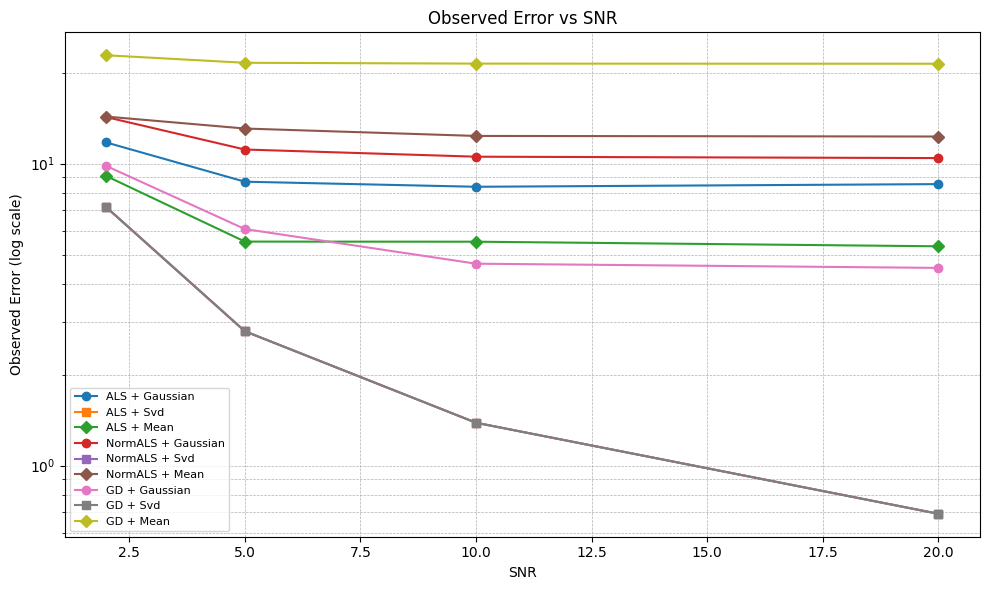

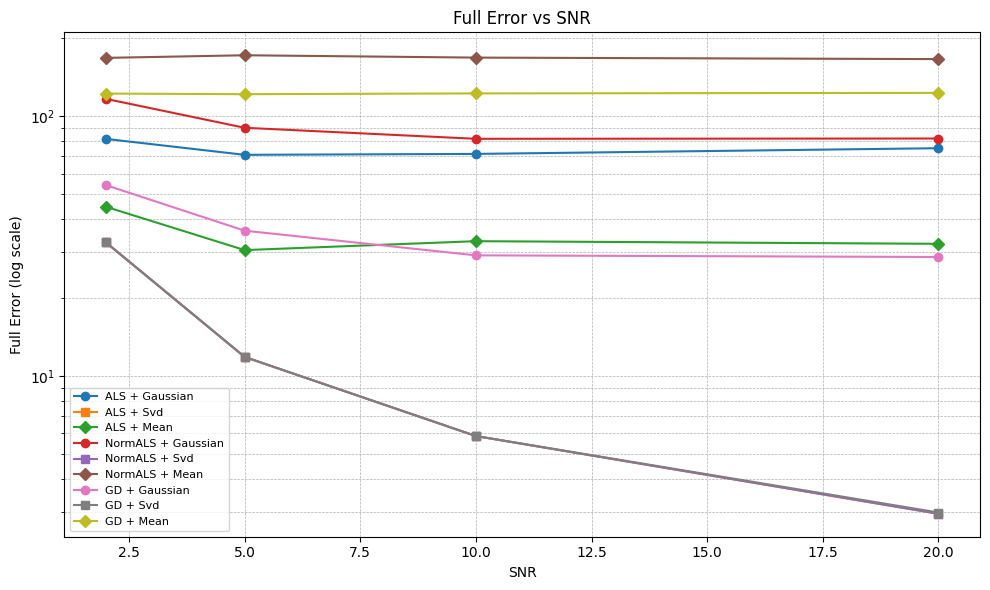

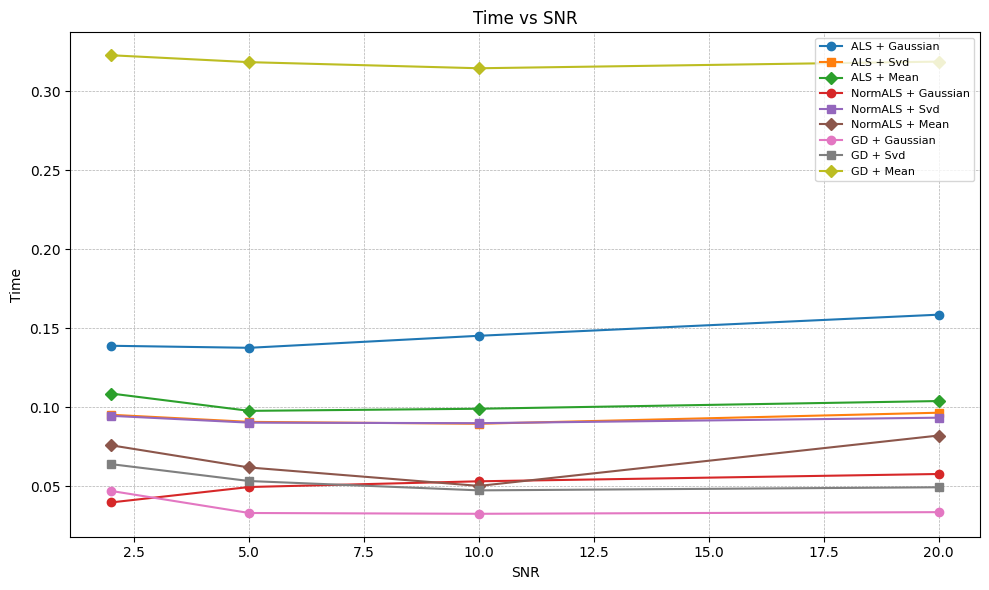

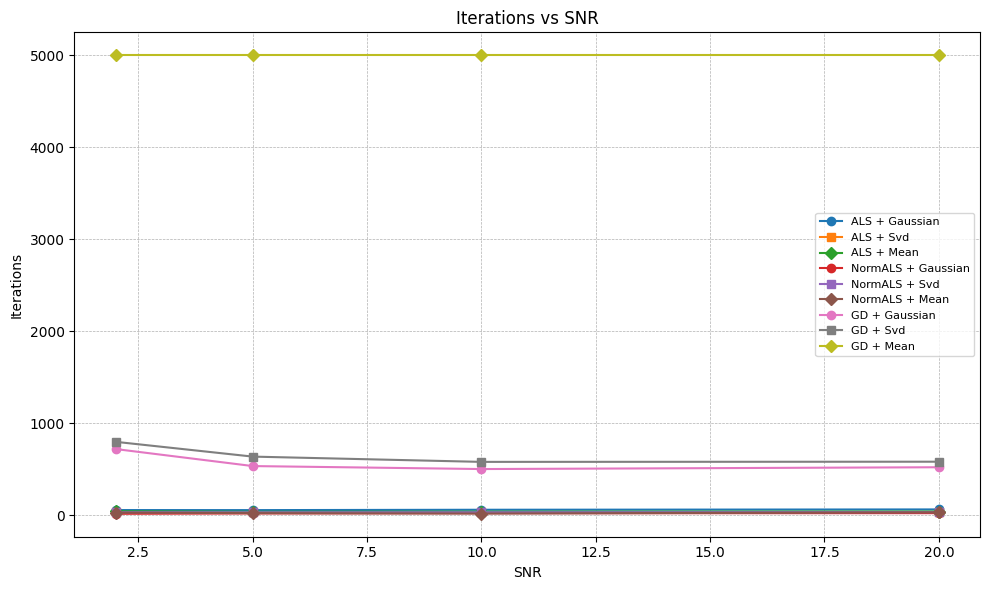

In [50]:
# === Plot each metric vs SNR ===
for metric_name, suffix in metrics.items():
    metric_data = defaultdict(list)

    for snr in snrs:
        for solver in solvers:
            if solver == 'Baseline SVD':
                key = f"{solver}"
                try:
                    value = np.mean(accum_results[snr][solver][f"{solver}_{suffix}"])
                    metric_data[key].append(value)
                except KeyError:
                    pass
            else:
                for method in methods:
                    key = f"{solver} + {method}"
                    try:
                        value = np.mean(accum_results[snr][method][f"{solver}_{suffix}"])
                        metric_data[key].append(value)
                    except KeyError:
                        pass

    # === Plot ===
    plt.figure(figsize=(10, 6))
    for label, values in metric_data.items():
        method = label.split(' + ')[-1]
        marker = method_markers.get(method, 'x')
        plt.plot(snrs, values, marker=marker, label=label)

    plt.xlabel('SNR')
    plt.ylabel(metric_name + (' (log scale)' if 'Error' in metric_name else ''))
    plt.title(f'{metric_name} vs SNR')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    if 'Error' in metric_name:
        plt.yscale('log')
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.savefig(f'{suffix}_vs_snr.pdf')
    plt.show()
